In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('Mall_Customers.csv')
print(data.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
X = data[["Annual Income (k$)", "Spending Score (1-100)"]].values

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
wcss = []  # Within-Cluster-Sum-of-Squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

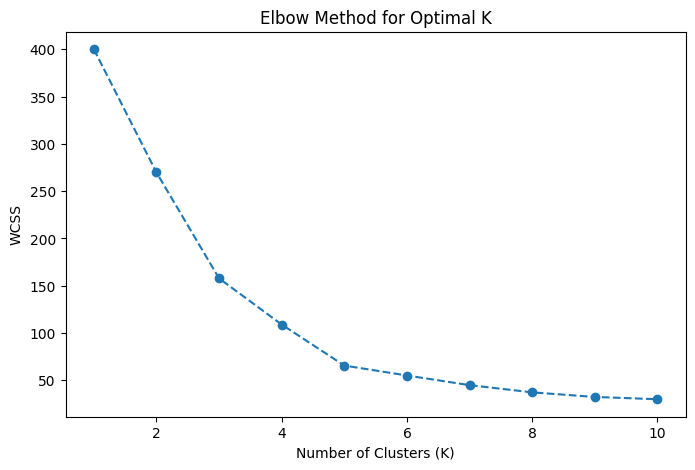

In [6]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker="o", linestyle="--")
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.show()

In [7]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

In [8]:
data["Cluster"] = y_kmeans

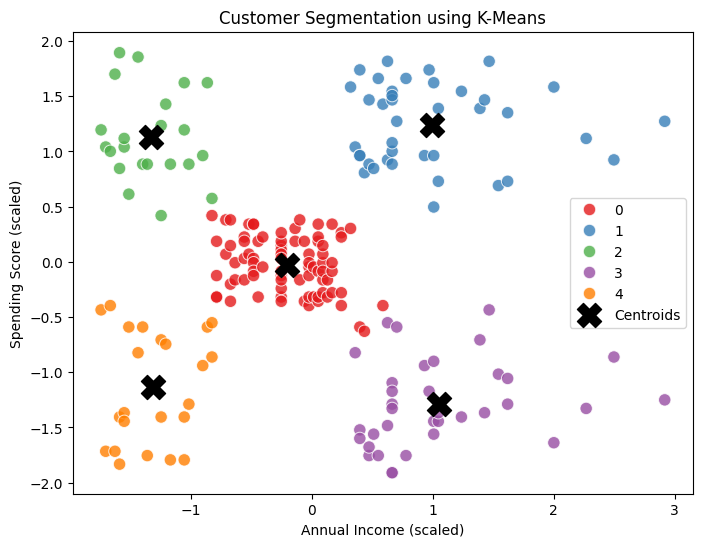

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:, 0],y=X_scaled[:, 1],hue=y_kmeans,palette="Set1",s=80,alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c="black",marker="X",label="Centroids")
plt.title("Customer Segmentation using K-Means")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.legend()
plt.show()

In [10]:
cluster_summary = data.groupby("Cluster")[["Annual Income (k$)", "Spending Score (1-100)"]].mean()
print(cluster_summary)

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043
